In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
df=pd.read_csv('/content/Titanic.csv')

In [32]:
df.head()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [33]:
df.describe()

,Age,Survived
count,756.000000,1313.000000
mean,30.397989,0.342727
std,14.259049,0.474802
min,0.170000,0.000000
25%,21.000000,0.000000
50%,28.000000,0.000000
75%,39.000000,1.000000
max,71.000000,1.000000


In [34]:
df.isnull().sum()

,0
Name,0
PClass,1
Age,557
Sex,0
Survived,0


In [35]:
df=df.drop(columns='Name',axis=1)

In [36]:
df.head()

,PClass,Age,Sex,Survived
0,1st,29.00,female,1
1,1st,2.00,female,0
2,1st,30.00,male,0
3,1st,25.00,female,0
4,1st,0.92,male,1


In [37]:
df['PClass']=df['PClass'].replace({'1st':1,'2nd':2,'3rd':3})

/tmp/ipython-input-3807672901.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PClass']=df['PClass'].replace({'1st':1,'2nd':2,'3rd':3})


In [38]:
df.head()

,PClass,Age,Sex,Survived
0,1.0,29.00,female,1
1,1.0,2.00,female,0
2,1.0,30.00,male,0
3,1.0,25.00,female,0
4,1.0,0.92,male,1


In [39]:
df.PClass=df.PClass.fillna(df.PClass.mean())

In [40]:
df.head()

,PClass,Age,Sex,Survived
0,1.0,29.00,female,1
1,1.0,2.00,female,0
2,1.0,30.00,male,0
3,1.0,25.00,female,0
4,1.0,0.92,male,1


In [41]:
df.isnull().sum()

,0
PClass,0
Age,557
Sex,0
Survived,0


In [42]:
df.Sex=df.Sex.replace({'male':0,'female':1})

/tmp/ipython-input-3835671816.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Sex=df.Sex.replace({'male':0,'female':1})


In [43]:

df.Age=df.Age.fillna(df.Age.mean())

In [44]:
df.head()

,PClass,Age,Sex,Survived
0,1.0,29.00,1,1
1,1.0,2.00,1,0
2,1.0,30.00,0,0
3,1.0,25.00,1,0
4,1.0,0.92,0,1


In [45]:
df.PClass=df.PClass.astype('int')

In [46]:
df.head()

,PClass,Age,Sex,Survived
0,1,29.00,1,1
1,1,2.00,1,0
2,1,30.00,0,0
3,1,25.00,1,0
4,1,0.92,0,1


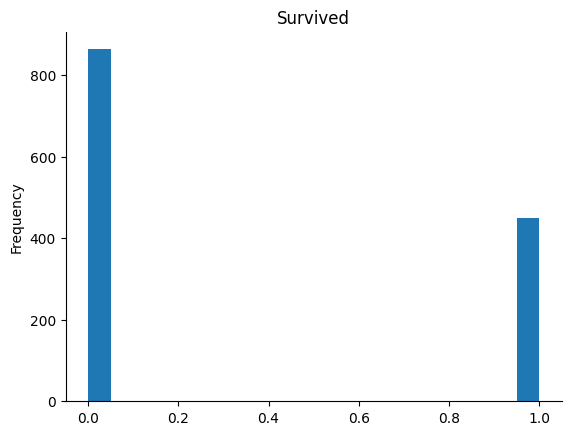

In [59]:
# @title Survived

from matplotlib import pyplot as plt
df['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

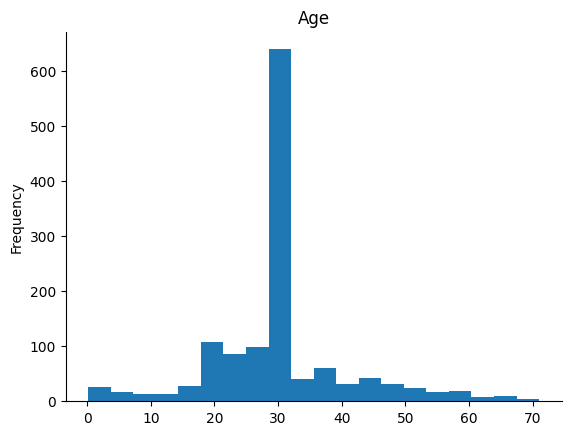

In [58]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [47]:
# train test split
X=df.drop(columns='Survived',axis=1)
Y=df['Survived']

In [48]:
# standard scalar for age
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)

In [52]:
#now start training
X_train,X_test,Y_train,Y_test=train_test_split(standardized_data,Y,test_size=0.2,random_state=2)

In [55]:
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

0.8212927756653993


In [56]:
#now save model using pickel
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [57]:
#now save scaler
filename='standard_scalar.pkl'
pickle.dump(scaler,open(filename,'wb'))